<a href="https://colab.research.google.com/github/Pablin72/Reconocimiento-Facial/blob/main/ProyectoIA_RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Configuración**

---

Antes de continuar, vamos a **recopilar e importar todos los módulos** que son **necesarios en el cuaderno**. Esto nos permitirá **trabajar de manera eficiente en todo el cuaderno**.

In [ ]:
# Common
import os
import cv2 as cv
import numpy as np
import seaborn as sns
from IPython.display import clear_output as cls
import pandas as pd
import os
import imutils
from PIL import Image
import random

# Data
from tqdm import tqdm
from glob import glob
from keras.preprocessing.image import ImageDataGenerator

# Data Visuaalization
import plotly.express as px
import matplotlib.pyplot as plt

# Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
IMG_W, IMG_H, IMG_C = (150, 150, 3)

In [ ]:
# Directorio donde se encuentran las imágenes originales
root_path = '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos'

# Obtener la lista de nombres de las personas
dir_names = os.listdir(root_path)
person_names = [name.split("_")[-1].title() for name in dir_names]
n_individuals = len(person_names)


In [ ]:
person_names

['Sebastian',
 'Desconocidos',
 'Pablo',
 'Diego',
 'Mattew',
 'Anthony',
 'Fernando',
 'Sergio']

## Crear nuevas imágenes

In [ ]:
'''
# Ruta de la carpeta principal que contiene los directorios de cada persona
carpeta_principal = '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos'
carpeta_principal_generadas = '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos Generadas'

# Crea la carpeta principal de imágenes generadas si no existe
os.makedirs(carpeta_principal_generadas, exist_ok=True)

# Obtén la lista de directorios de cada persona
directorios_personas = [nombre for nombre in os.listdir(carpeta_principal) if os.path.isdir(os.path.join(carpeta_principal, nombre))]

# Parámetros para generar las imágenes adicionales
num_imagenes_generadas = 5
angulos_rotacion = [-10, -5, 5, 10]
traslaciones = [(10, 10), (-10, -10), (10, -10), (-10, 10)]
espejar_horizontal = True

# Función para generar imágenes adicionales
def generar_imagenes_adicionales(imagen, directorio_persona, nombre_imagen):
    # Crea el directorio para las imágenes generadas si no existe
    directorio_generado = os.path.join(carpeta_principal_generadas, directorio_persona)
    os.makedirs(directorio_generado, exist_ok=True)

    # Genera imágenes adicionales
    for i in range(num_imagenes_generadas):
        # Rotación
        angulo = random.choice(angulos_rotacion)
        matriz_rotacion = cv.getRotationMatrix2D((imagen.shape[1] / 2, imagen.shape[0] / 2), angulo, 1)
        imagen_rotada = cv.warpAffine(imagen, matriz_rotacion, (imagen.shape[1], imagen.shape[0]))

        # Traslación
        traslacion = random.choice(traslaciones)
        matriz_traslacion = np.float32([[1, 0, traslacion[0]], [0, 1, traslacion[1]]])
        imagen_traslada = cv.warpAffine(imagen, matriz_traslacion, (imagen.shape[1], imagen.shape[0]))

        # Espejo horizontal
        if espejar_horizontal:
            imagen_espejada = cv.flip(imagen, 1)
        else:
            imagen_espejada = imagen

        # Guarda las imágenes generadas en el directorio correspondiente
        nombre_imagen_generada = f"{nombre_imagen}_rotada{i}.jpg"
        cv.imwrite(os.path.join(directorio_generado, nombre_imagen_generada), imagen_rotada)
        print(nombre_imagen_generada)

        nombre_imagen_generada = f"{nombre_imagen}_traslada{i}.jpg"
        cv.imwrite(os.path.join(directorio_generado, nombre_imagen_generada), imagen_traslada)
        print(nombre_imagen_generada)

        nombre_imagen_generada = f"{nombre_imagen}_espejada{i}.jpg"
        cv.imwrite(os.path.join(directorio_generado, nombre_imagen_generada), imagen_espejada)
        print(nombre_imagen_generada)

# Genera imágenes adicionales para cada persona
for directorio_persona in directorios_personas:
    # Ruta del directorio de la persona actual
    ruta_directorio_persona = os.path.join(carpeta_principal, directorio_persona)

    # Crea el directorio correspondiente en la carpeta principal de imágenes generadas
    directorio_persona_generada = os.path.join(carpeta_principal_generadas, directorio_persona)
    os.makedirs(directorio_persona_generada, exist_ok=True)

    # Obtiene la lista de imágenes de la persona actual
    imagenes_persona = [nombre for nombre in os.listdir(ruta_directorio_persona) if os.path.isfile(os.path.join(ruta_directorio_persona, nombre))]

    # Selecciona aleatoriamente 100 imágenes de la persona actual
    imagenes_seleccionadas = random.sample(imagenes_persona, min(len(imagenes_persona), 100))

    # Genera imágenes adicionales para cada imagen seleccionada
    for imagen_seleccionada in imagenes_seleccionadas:
        # Lee la imagen
        ruta_imagen = os.path.join(ruta_directorio_persona, imagen_seleccionada)
        imagen = cv.imread(ruta_imagen)

        # Obtiene el nombre de la imagen original
        nombre_imagen = imagen_seleccionada.split(".")[0]

        # Genera imágenes adicionales para la imagen actual
        generar_imagenes_adicionales(imagen, directorio_persona, nombre_imagen)

root_path = '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos Generadas'
'''


'\n# Ruta de la carpeta principal que contiene los directorios de cada persona\ncarpeta_principal = \'/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos\'\ncarpeta_principal_generadas = \'/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos Generadas\'\n\n# Crea la carpeta principal de imágenes generadas si no existe\nos.makedirs(carpeta_principal_generadas, exist_ok=True)\n\n# Obtén la lista de directorios de cada persona\ndirectorios_personas = [nombre for nombre in os.listdir(carpeta_principal) if os.path.isdir(os.path.join(carpeta_principal, nombre))]\n\n# Parámetros para generar las imágenes adicionales\nnum_imagenes_generadas = 5\nangulos_rotacion = [-10, -5, 5, 10]\ntraslaciones = [(10, 10), (-10, -10), (10, -10), (-10, 10)]\nespejar_horizontal = True\n\n# Función para generar imágenes adicionales\ndef generar_imagenes_adicionales(imagen, directorio_persona, nombre_imagen):\n    # Crea el directorio para las imágenes generadas si no existe\n    dire

In [ ]:
# Cantidad de imagenes por personas
n_images_per_person = [len(os.listdir(root_path + '/' + name)) for name in dir_names]
n_images = sum(n_images_per_person)

# Show
print(f"Total Number of Images : {n_images}.")

Total Number of Images : 5113.


In [ ]:
# Plot the Distribution of number of images per person.
fig = px.bar(x=person_names, y=n_images_per_person, color=person_names)
fig.update_layout({'title':{'text':"Fotos por persona"}})
fig.show()

In [ ]:
# Select all the file paths : 50 images per person.
filepaths = [path  for name in dir_names for path in glob(root_path + "/" + name + "/*")[:400]]
print(filepaths)
np.random.shuffle(filepaths)
print(f"Total number of images to be loaded : {len(filepaths)}")

# Create space for the images
all_images = np.empty(shape=(len(filepaths), IMG_W, IMG_H, IMG_C), dtype = np.float32)
all_labels = np.empty(shape=(len(filepaths), 1), dtype = np.int32)



['/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sebastian/rostro_705.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sebastian/rostro_655.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sebastian/rostro_686.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sebastian/rostro_678.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sebastian/rostro_651.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sebastian/rostro_703.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sebastian/rostro_666.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sebastian/rostro_668.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sebastian/rostro_680.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sebastian/rostro_661.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocim

In [ ]:
import random

# Crear un arreglo ordenado del 0 hasta la cantidad de imágenes que van a ser cargadas
aleatorios = list(range(0, 3200))

# Desordenar los elementos del arreglo
random.shuffle(aleatorios)

print(aleatorios)

[1743, 1037, 1638, 414, 3070, 1082, 2535, 2128, 1463, 2974, 396, 242, 586, 381, 930, 2929, 1356, 191, 3135, 941, 1488, 3108, 2240, 1029, 3027, 485, 2509, 2358, 68, 1989, 1578, 1649, 2315, 656, 1513, 2023, 939, 2907, 1031, 2753, 2345, 1187, 97, 2268, 1147, 2040, 1038, 383, 816, 1770, 3085, 1345, 1007, 241, 1400, 2545, 1312, 309, 1857, 2951, 460, 84, 2762, 2557, 1634, 1362, 1316, 2314, 2312, 3069, 2083, 1727, 2374, 3175, 220, 344, 790, 1553, 2196, 3002, 2627, 785, 1739, 1785, 2868, 1492, 1757, 1449, 417, 2118, 515, 3138, 3147, 2072, 3081, 2419, 1102, 362, 2334, 2318, 2691, 181, 1852, 1591, 2745, 2992, 3148, 3089, 1887, 2430, 1395, 3122, 1788, 1134, 459, 203, 1060, 1361, 2916, 24, 2335, 696, 1633, 1891, 2435, 698, 751, 2051, 2865, 2885, 237, 2376, 2218, 836, 277, 1717, 2175, 2969, 1014, 2800, 2176, 2588, 154, 1253, 1875, 2027, 2804, 1461, 2909, 2682, 1627, 119, 3096, 2668, 2238, 253, 366, 1619, 2609, 8, 1694, 249, 2954, 3151, 972, 2631, 915, 1471, 3120, 2147, 2643, 1402, 598, 72, 1493, 33

In [ ]:
# For each path, load the image and apply some preprocessing.

for index, path in tqdm(enumerate(filepaths), desc="Loading Data"):

    # Extract label
    label = [name for name in dir_names if name in path][0]
    label = person_names.index(label.title())

    # Load the Image
    image = plt.imread(path)

    # Convert image stype
    image = image.astype(np.float32)/255.0

    all_images[aleatorios[index]] = image
    all_labels[aleatorios[index]] = label

Loading Data: 3200it [02:26, 21.78it/s]


In [ ]:
index

3199

# **Data Visualization**
---

Now that we have **successfully loaded our data set**, we can **proceed to visualize it**. **Visualization** is a **crucial step** in any **data analysis task**, as it helps us **gain insight** into the **data and identify any patterns** or **anomalies that might be present**. In the case of **face recognition**, **visualization allows** us to get a **sense of the quality** of the **images** and how well they **represent each individual**.

In [ ]:
#MODIFICAR ESTE CODIGO PARA QUE SOLO RECORRA EL ARREGLO ALEATORIO QUE YA SE CREO
def show_data(
    images: np.ndarray,
    labels: np.ndarray,
    GRID: tuple=(7,4),
    FIGSIZE: tuple=(25,50),
    recog_fn = None,
    database = None
) -> None:

    """
    Function to plot a grid of images with their corresponding labels.

    Args:
        images (numpy.ndarray): Array of images to plot.
        labels (numpy.ndarray): Array of corresponding labels for each image.
        GRID (tuple, optional): Tuple with the number of rows and columns of the plot grid. Defaults to (15,6).
        FIGSIZE (tuple, optional): Tuple with the size of the plot figure. Defaults to (30,50).
        recog_fn (function, optional): Function to perform face recognition. Defaults to None.
        database (dictionary, optional): Dictionary with the encoding of the images for face recognition. Defaults to None.

Returns:
        None
    """

    # Plotting Configuration
    plt.figure(figsize=FIGSIZE)
    n_rows, n_cols = GRID
    n_images = n_rows * n_cols
    contador = 0
    # loop over the images and labels
    for index in range(n_images):

        # Select image in the corresponding label randomly
        image, label = images[index], person_names[int(labels[index])]

        # Create a Subplot
        plt.subplot(n_rows, n_cols, index+1)

        # Plot Image
        plt.imshow(image)
        plt.axis('off')

        if recog_fn is None:
            # Plot title
            plt.title(label)
        else:
            recognized = recog_fn(image, database)
            plt.title(f"True:{label}\nPred:{recognized}")

    # Show final Plot
    plt.tight_layout()
    plt.show()

<ipython-input-76-cb24c06d1b89>:35: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



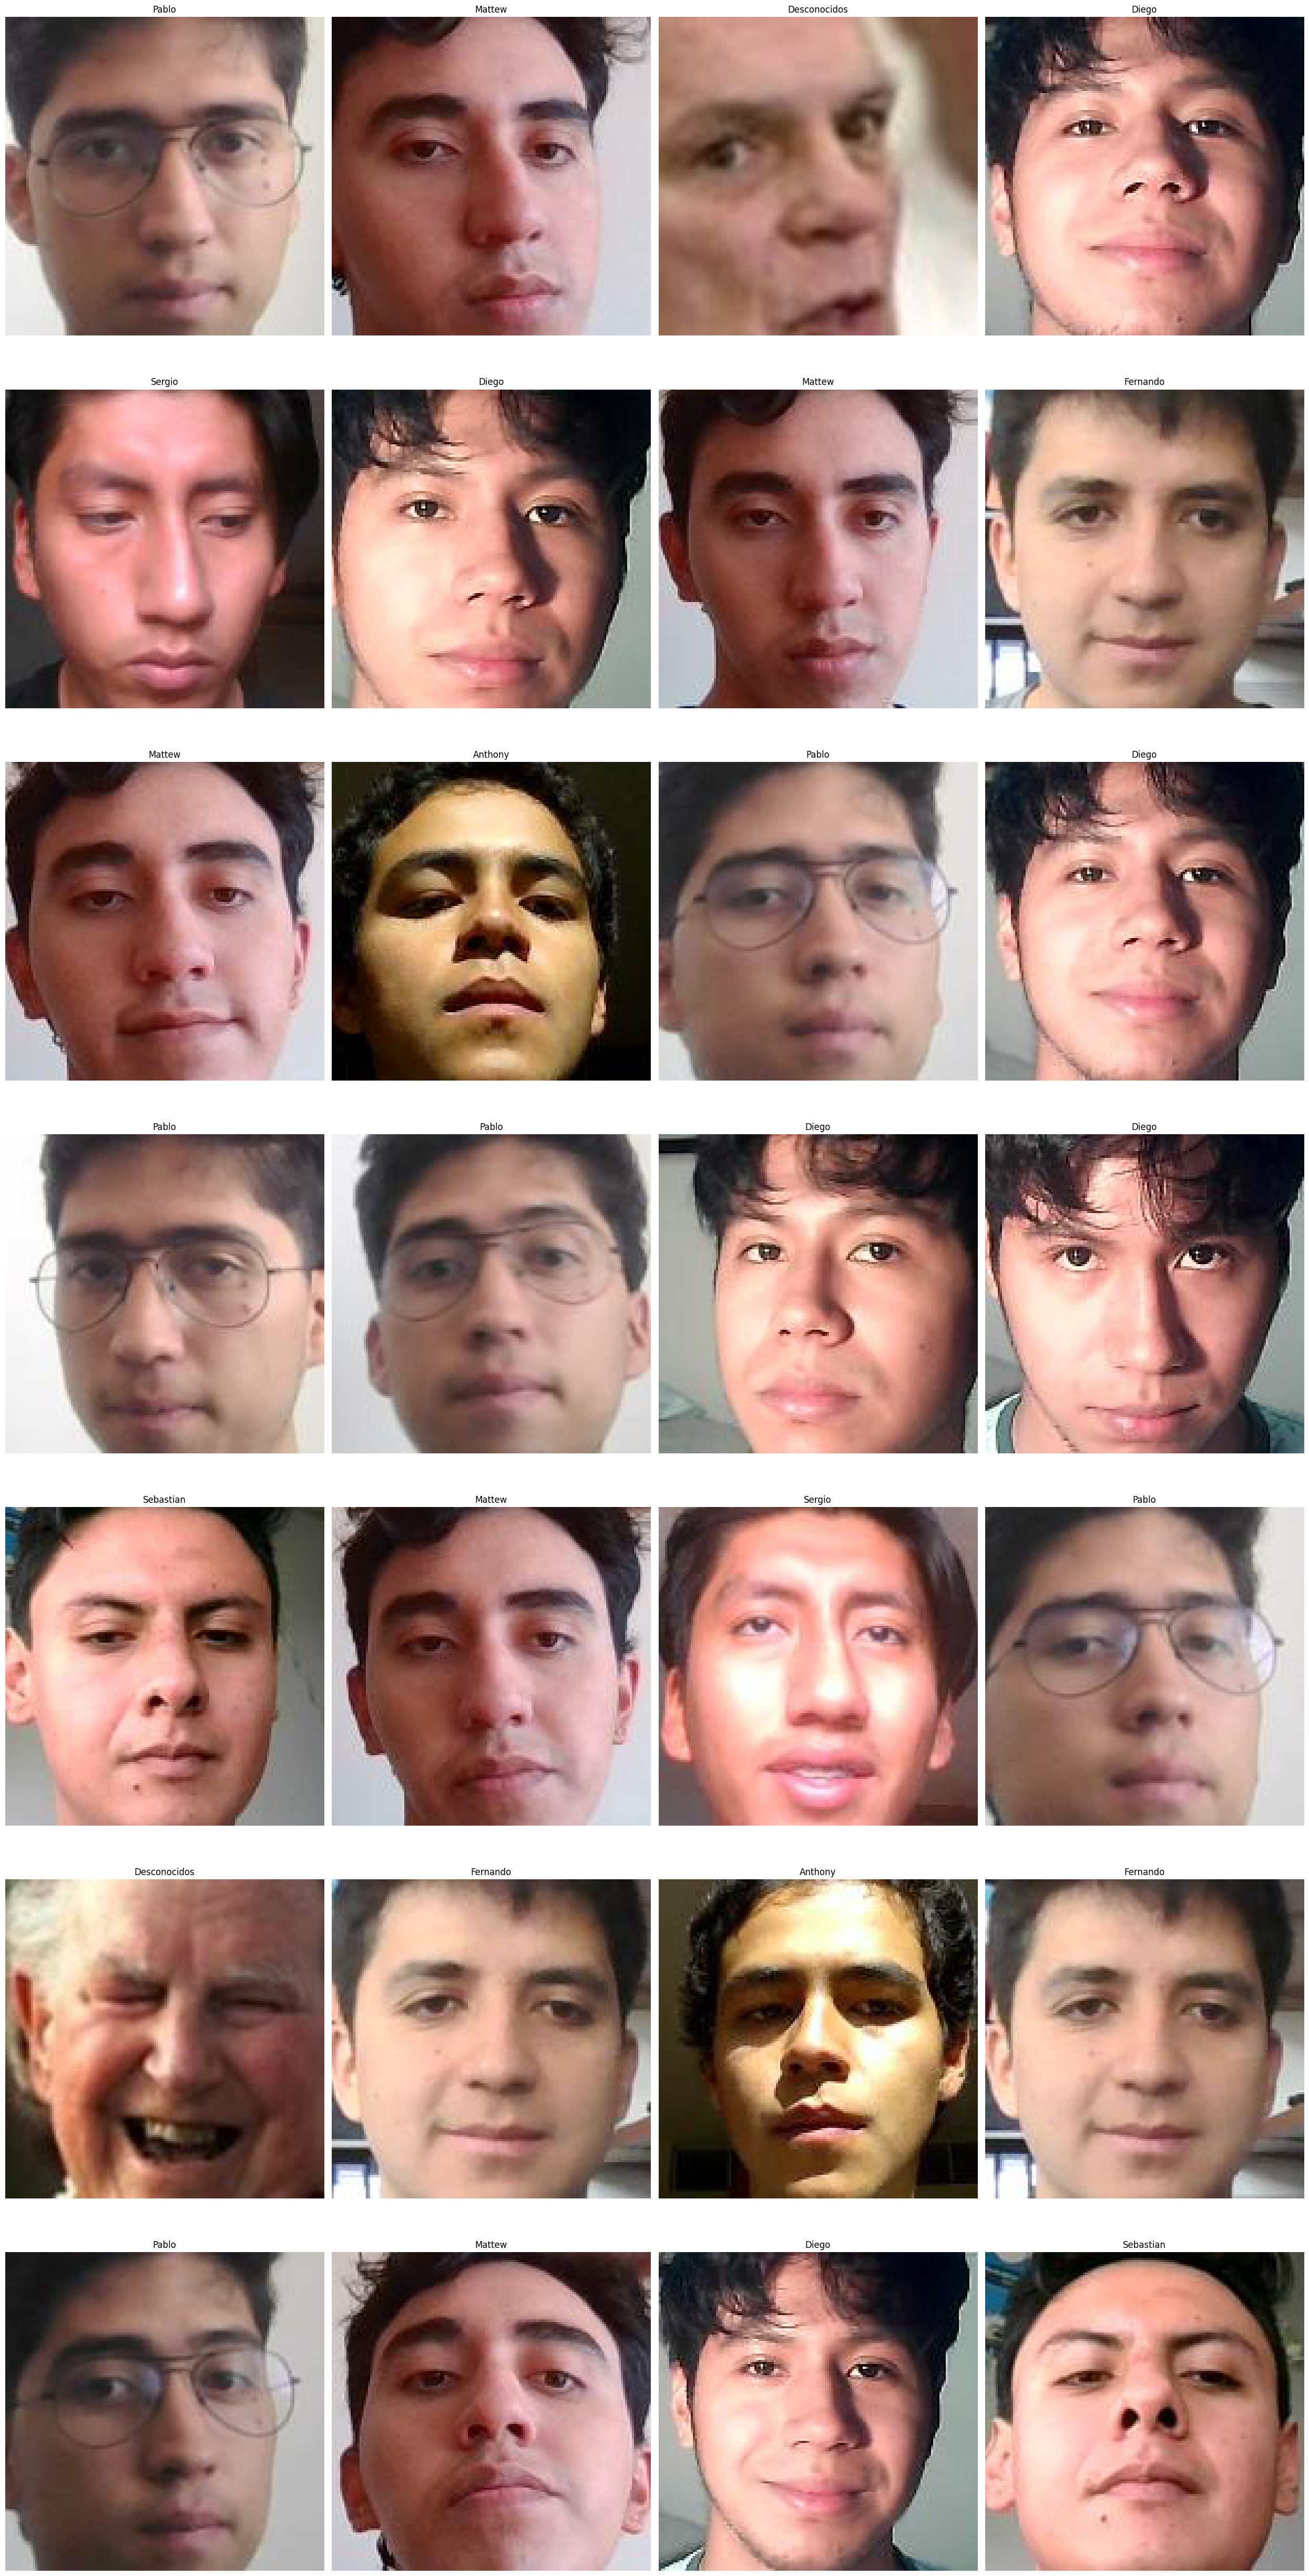

In [ ]:
show_data(images = all_images, labels = all_labels)

In [ ]:
def create_model():
    model = Sequential()

    model.add(Conv2D(64, (3,3), input_shape = (150, 150, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())


    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(8, activation = 'softmax'))


    return model

In [ ]:
X = all_images

###Dummies

In [ ]:
# Crear un DataFrame a partir de las etiquetas
y = pd.DataFrame(all_labels, columns=['label'])

# Convertir las etiquetas a variables ficticias (dummies)
y_dummies = pd.get_dummies(y['label'])

In [ ]:
y.value_counts()

label
0        400
1        400
2        400
3        400
4        400
5        400
6        400
7        400
dtype: int64

In [ ]:
cnn_model = create_model()

In [ ]:
print(cnn_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 activation_7 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(X, y_dummies, test_size=0.3, random_state=90)

In [ ]:
cnn_model.compile(optimizer= 'adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
cnn_model.fit(x= train_images, y = train_labels, validation_data = (test_images, test_labels),
             batch_size=80, epochs=50, verbose = 1)

Epoch 1/25
18/18 [==============================] - 96s 5s/step - loss: 1.1870 - accuracy: 0.5164 - val_loss: 0.8302 - val_accuracy: 0.6800
Epoch 2/25
18/18 [==============================] - 95s 5s/step - loss: 0.5257 - accuracy: 0.8429 - val_loss: 0.2956 - val_accuracy: 0.9150
Epoch 3/25
18/18 [==============================] - 100s 6s/step - loss: 0.1685 - accuracy: 0.9600 - val_loss: 0.0650 - val_accuracy: 0.9917
Epoch 4/25
18/18 [==============================] - 96s 5s/step - loss: 0.0651 - accuracy: 0.9886 - val_loss: 0.0653 - val_accuracy: 0.9850
Epoch 5/25
18/18 [==============================] - 102s 6s/step - loss: 0.0392 - accuracy: 0.9914 - val_loss: 0.0380 - val_accuracy: 0.9883
Epoch 6/25
18/18 [==============================] - 95s 5s/step - loss: 0.0246 - accuracy: 0.9950 - val_loss: 0.0216 - val_accuracy: 0.9950
Epoch 7/25
18/18 [==============================] - 95s 5s/step - loss: 0.0150 - accuracy: 0.9979 - val_loss: 0.0172 - val_accuracy: 0.9950
Epoch 8/25
18/18 [

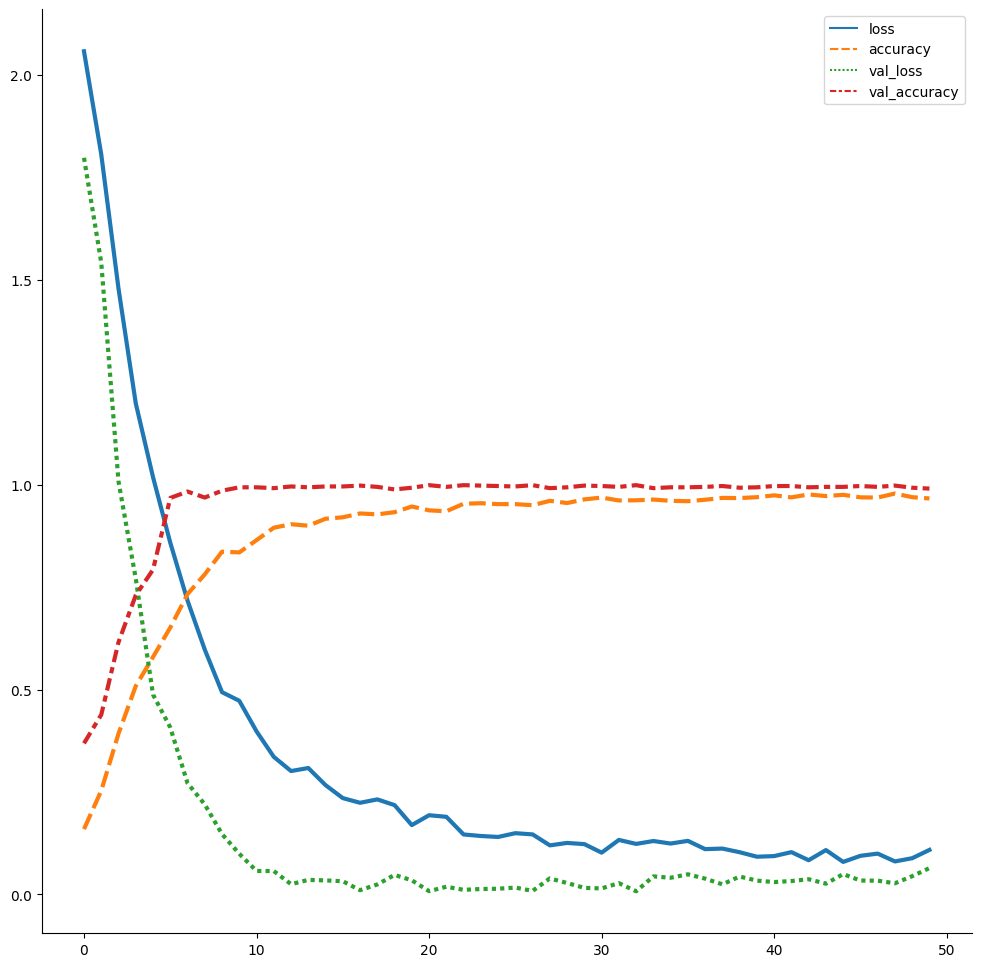

In [ ]:
loss = pd.DataFrame(cnn_model.history.history)
plt.figure(figsize = (12, 12))
sns.lineplot(data = loss, lw = 3)
sns.despine()

In [ ]:
test_labels_2 = np.argmax(test_labels.values, axis=1)
test_labels_predict = cnn_model.predict(test_images)
test_labels_predict = np.argmax(test_labels_predict, axis=1)
print(confusion_matrix(test_labels_2, test_labels_predict))
print(classification_report(test_labels_2, test_labels_predict))

30/30 [==============================] - 16s 522ms/step
[[124   0   0   0   0   0   0   0]
 [  1 113   2   1   0   1   1   1]
 [  0   0 126   0   0   0   0   0]
 [  0   0   0 122   0   0   0   0]
 [  0   0   1   0 125   0   0   0]
 [  0   0   0   0   0 112   0   0]
 [  0   1   0   0   0   0 104   0]
 [  0   0   0   0   0   0   0 125]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       124
           1       0.99      0.94      0.97       120
           2       0.98      1.00      0.99       126
           3       0.99      1.00      1.00       122
           4       1.00      0.99      1.00       126
           5       0.99      1.00      1.00       112
           6       0.99      0.99      0.99       105
           7       0.99      1.00      1.00       125

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960



In [ ]:
train_labels_2 = np.argmax(train_labels.values, axis=1)
train_labels_predict = cnn_model.predict(train_images)
train_labels_predict = np.argmax(train_labels_predict, axis=1)
print(confusion_matrix(train_labels_2, train_labels_predict))
print(classification_report(train_labels_2, train_labels_predict))

70/70 [==============================] - 39s 556ms/step
[[276   0   0   0   0   0   0   0]
 [  0 278   1   0   0   1   0   0]
 [  0   0 274   0   0   0   0   0]
 [  0   0   0 278   0   0   0   0]
 [  0   0   0   0 274   0   0   0]
 [  0   0   0   0   0 288   0   0]
 [  0   1   0   0   0   0 294   0]
 [  0   0   0   0   0   0   0 275]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      0.99      0.99       280
           2       1.00      1.00      1.00       274
           3       1.00      1.00      1.00       278
           4       1.00      1.00      1.00       274
           5       1.00      1.00      1.00       288
           6       1.00      1.00      1.00       295
           7       1.00      1.00      1.00       275

    accuracy                           1.00      2240
   macro avg       1.00      1.00      1.00      2240
weighted avg       1.00      1.00      1.00      2240



In [ ]:
from PIL import Image

def identify_person(image_path, model):
    #
    img = Image.open(image_path)
    img = img.resize((150, 150))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    #
    predictions = model.predict(img)
    predicted_label = np.argmax(predictions)

    return predicted_label

In [160]:
# Directorio de imágenes
image_directory = '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos'

# Lista de nombres de las personas
person_names = os.listdir(image_directory)

# Bucle para seleccionar y predecir 50 imágenes aleatorias de todas las personas
for _ in range(50):
    # Seleccionar una persona aleatoria
    random_person = random.choice(person_names)

    # Directorio de la persona seleccionada
    person_directory = os.path.join(image_directory, random_person)

    # Lista de imágenes de la persona
    image_files = os.listdir(person_directory)

    # Seleccionar un archivo de imagen aleatorio de la persona
    random_image_file = random.choice(image_files)
    random_image_path = os.path.join(person_directory, random_image_file)

    # Realizar la predicción y obtener el nombre de la persona
    predice = identify_person(random_image_path, cnn_model)
    person_name = person_names[predice]

    # Imprimir el resultado
    print(f"Imagen seleccionada: {random_image_path}")
    print(f"Persona predicha: {person_name}")
    print("Posicion: ", predice)
    print("---")


1/1 [==============================] - 0s 60ms/step
Imagen seleccionada: /content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Desconocidos/rostro_14.jpg
Persona predicha: Desconocidos
Posicion:  1
---
1/1 [==============================] - 0s 67ms/step
Imagen seleccionada: /content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Desconocidos/rostro_635.jpg
Persona predicha: Sergio
Posicion:  7
---
1/1 [==============================] - 0s 70ms/step
Imagen seleccionada: /content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sebastian/rostro_475.jpg
Persona predicha: Sebastian
Posicion:  0
---
1/1 [==============================] - 0s 110ms/step
Imagen seleccionada: /content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Pablo/rostro_327.jpg
Persona predicha: Pablo
Posicion:  2
---
1/1 [==============================] - 0s 51ms/step
Imagen seleccionada: /content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Diego/rostro_72.jpg
Pe